# Reading Dataset

The [mushroom dataset](https://archive.ics.uci.edu/ml/datasets/mushroom) includes descriptions of hypothetical samples corresponding to 23
species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). 

Each species is identified as definitely *edible, definitely poisonous, or of unknown
edibility and not recommended*. This latter class was combined with the poisonous
one. 

Hence, the task given is a binary classification problem whereby, 
given the features of mushrooms, we are to classify the mushrooms 
into **p=Poisonous** or **e=edible**.

## Data Dictionary
| Columns | Descriptions |
| :--- | :--- |
| class                   | poisonous=p, edible=e| 
| cap-shape               | bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s|
| cap-surface             | fibrous=f,grooves=g,scaly=y,smooth=s |
| cap-color               | brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y|
| bruises                 | bruises=t,no=f |
| odor                    | almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s |
| gill-attachment         | attached=a,descending=d,free=f,notched=n|
| gill-spacing            | close=c,crowded=w,distant=d|
| gill-size               | broad=b,narrow=n |
| gill-color              | black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y|
| stalk-shape             | enlarging=e,tapering=t
| stalk-root              | bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,**missing=?** |
| stalk-surface-above-ring| fibrous=f,scaly=y,silky=k,smooth=s|
| stalk-surface-below-ring| fibrous=f,scaly=y,silky=k,smooth=s|
| stalk-color-above-ring  | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
| stalk-color-below-ring  | brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
| veil-type               | partial=p,universal=u|
| veil-color              | brown=n,orange=o,white=w,yellow=y|
| ring-number             | none=n,one=o,two=t|
| ring-type               | cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z|
| spore-print-color       | black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y|
| population              | abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y|
| habitat                 | grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d|

# Importing all libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

## Read data

In [2]:
data = pd.read_csv('mushrooms.csv')

# Exploratory Data Analysis

Understands the dataset and flag out flaws in the dataset.
Descriptive Summaries

By running .info() on our dataframe, the following are the initial observation of the dataset.

#Observations

The shape of dataset is (8124, 23) whereby there is 8124 observations and 23 columns. (22 Features + 1 Target Variable: "is-edible")
Datatype of all columns are object. However, from the documentation there are numerical feature which is encoded as string. (e.g. ring-number)


In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Get details of data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Check for NA values

In [5]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Check Shape of data

In [6]:
data.shape

(8124, 23)

## Description of data

In [7]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
data.duplicated().value_counts()

False    8124
dtype: int64

# Exploratory Data Analysis and Data Visualization

## Unique Values Exploration

Since all our columns are encoded in string and are categorical, one way to explore the values is number of unique values in each columns.

Observations

    Constant Value Column(1 Unique Value):

    "veil-type"

    As all datapoints have constant value = p in "veil-type", it does not provide any information to the target variable.

        One approach is to Drop the "veil-type" column entirely.

    Binary Columns(2 Unique Values):

    ["is-edible"(label), "bruises", "gill-attachment", "gill-spacing", "gill-size", "stalk-shape"]

    Nominal Categorical Columns(>2 Unique Values):

    `["cap-shape", "cap-surface", "cap-color", "odor", "gill-color",

    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-color", "ring-type", 
    "spore-print-color", "population", "habitat"]`

    There are 15 Nominal Categorical which describe the characteristics of mushrooms including the texture, colors, population and habitat.

        As there are abundance of Nominal Categorical features, creating One-Hot variables for all categorical features might create excessive dimensional spaces which can be computational expenssive and prone to overfitting (aka "The Curse of Dimensionality")

        There might be a need to explore further on feature selection and/or dimensionality reduction to mitigate the curse of dimensionality.

    Discrete Numerical Columns(Countable Values):

    "ring-number"

    Although it is technically a numerical column, since the number of unique values is low(nuique() == 3), we can treat it as a categorical column during the encoding.



In [9]:
# Dropping veil-type feature from the dataset as all datapoints have constant value = p in "veil-type", it does not provide any information to the target variable.


data.drop(columns = 'veil-type', inplace = True)

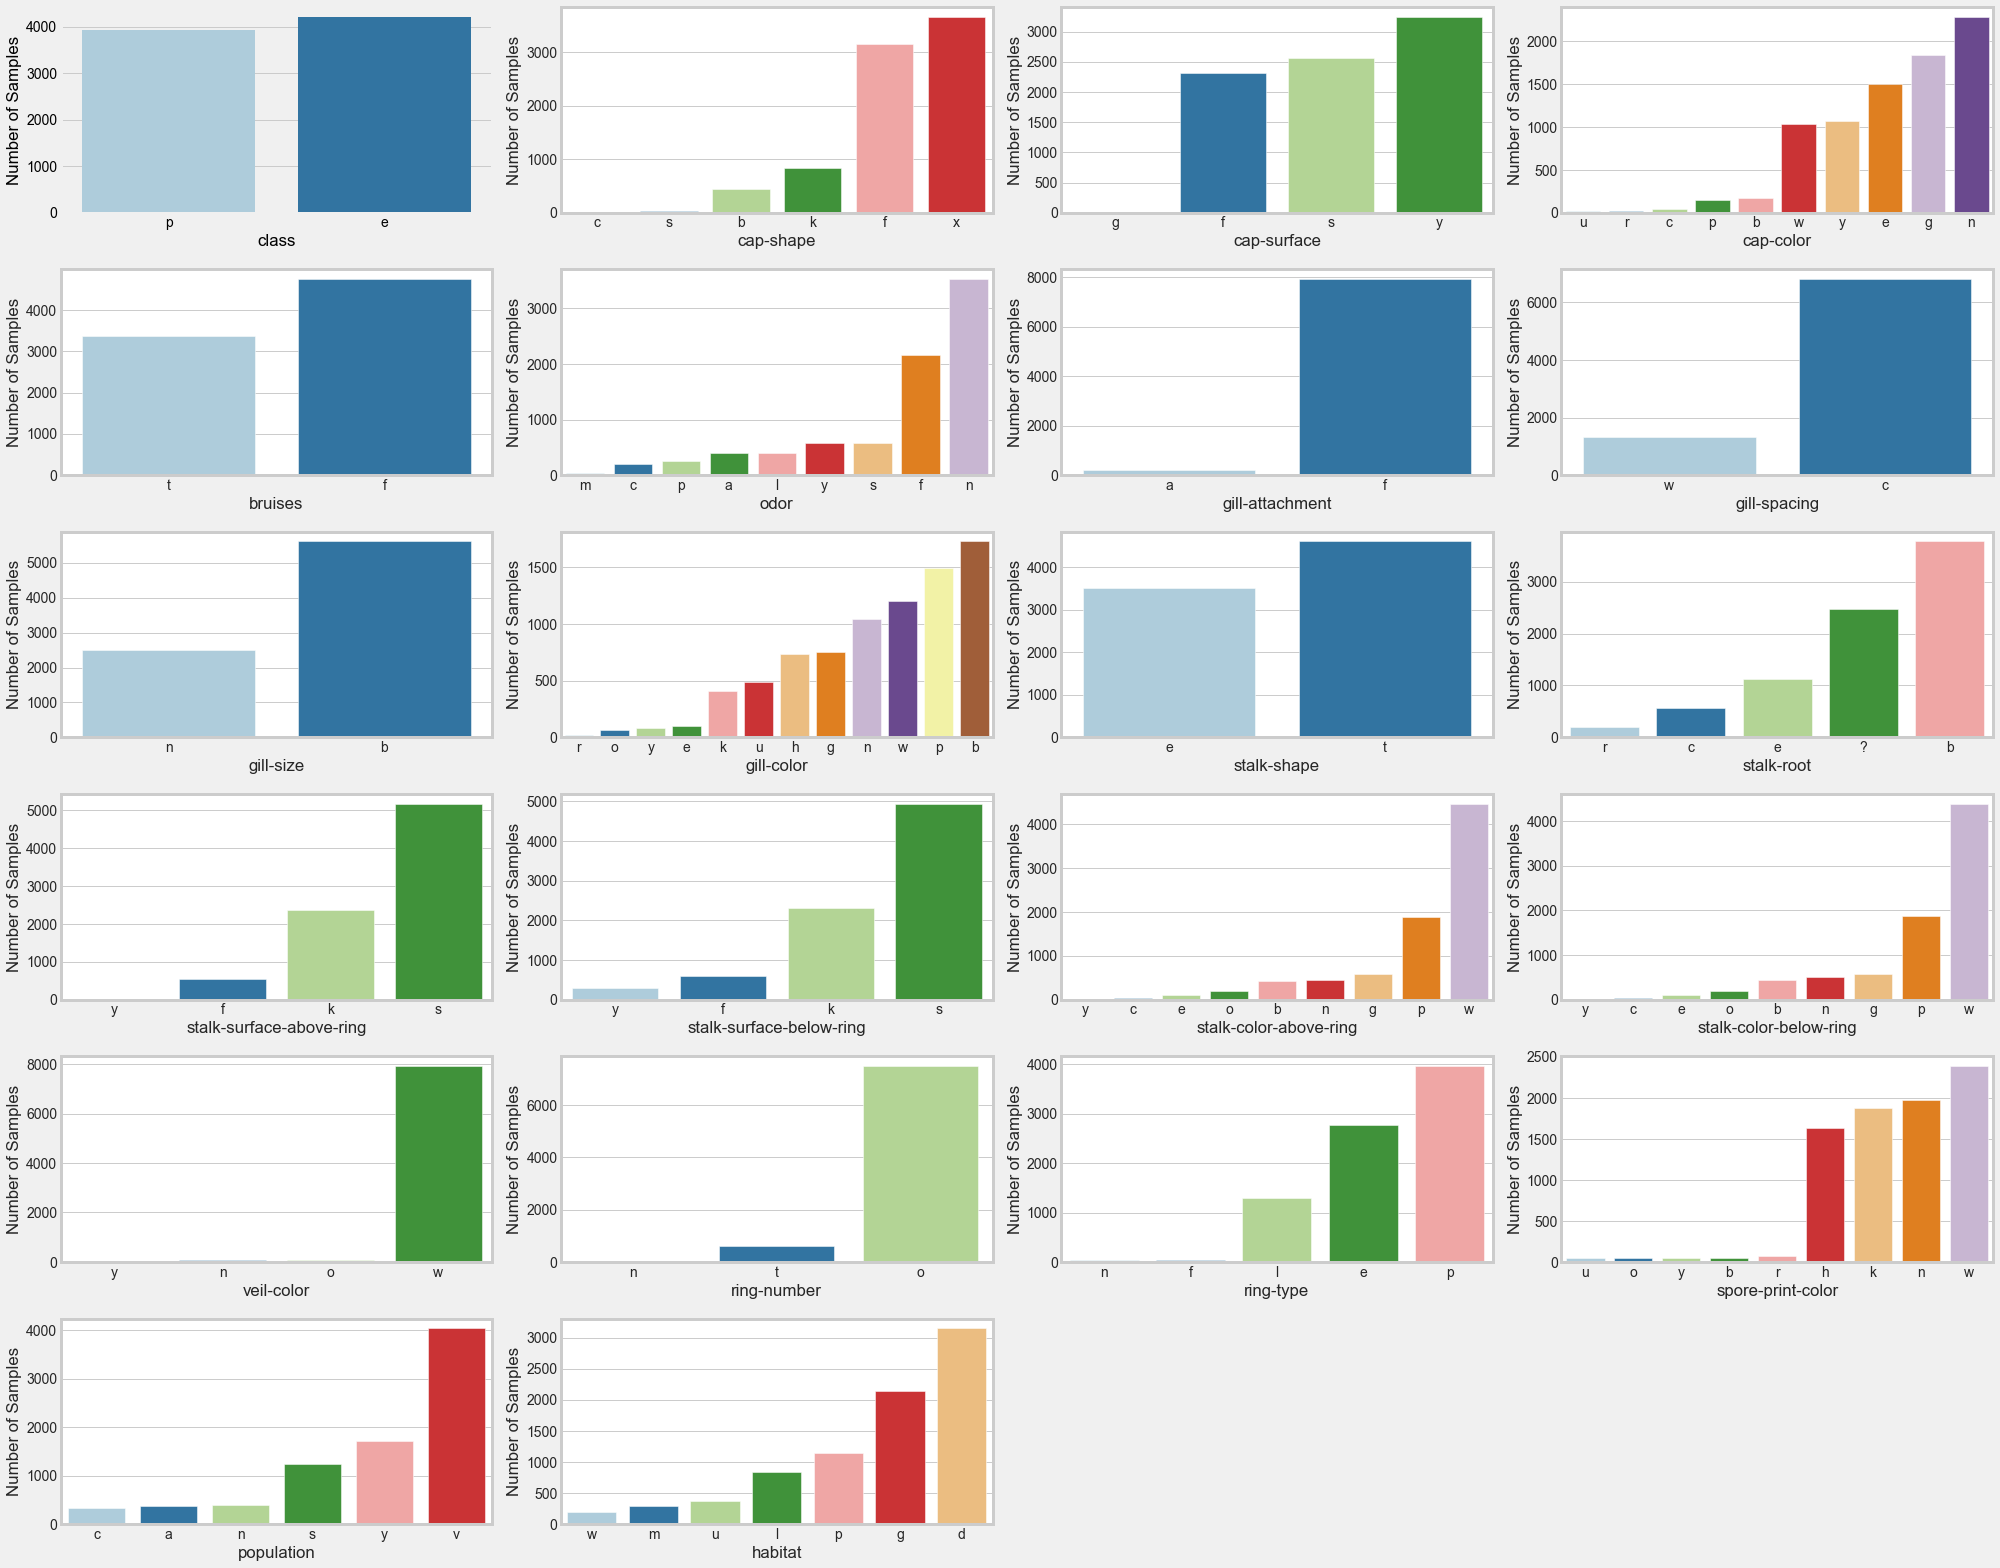

In [10]:
plt.figure(figsize=(28,22))
for i, col in enumerate(data.columns):
    sns.set_palette(sns.color_palette("Paired"))
    ax = plt.subplot(6,4,i+1)
    sns.countplot(
        x=col, data = data, ax = ax, 
        order = data[col].value_counts(ascending=True).index
    )
    sns.set_style('whitegrid')
    plt.xticks()
    plt.ylabel("Number of Samples")
    plt.tight_layout()
plt.show()

## Our class are perfectly balanced and therefore we do not need to oversample/undersample our data

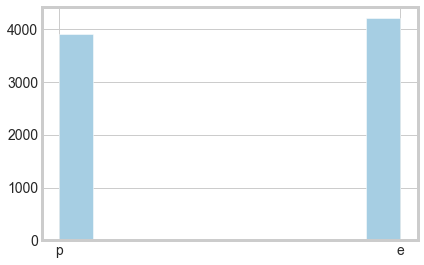

In [11]:
plt.hist(data['class']);

## Barchart for Mushrooms cap shapes

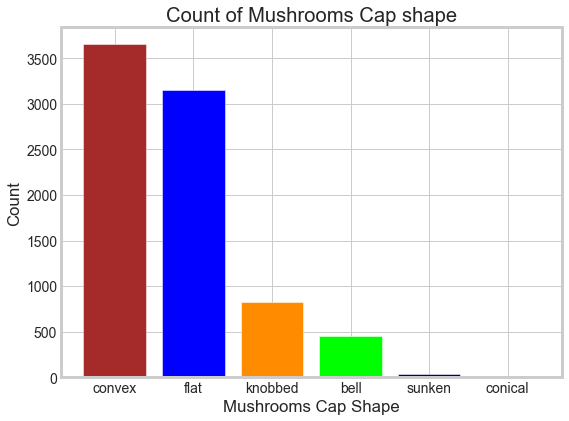

In [12]:
plt.figure(figsize=(8,6))
cap_shapes = data['cap-shape'].value_counts().tolist()
shape_names = ['convex','flat','knobbed','bell','sunken','conical']
colors = ['brown','blue','darkorange','lime','navy','red']
plt.bar(shape_names,cap_shapes,color = colors);
plt.xlabel('Mushrooms Cap Shape');
plt.ylabel("Count");
plt.title("Count of Mushrooms Cap shape");

## The number of mushrooms for each cap color categories

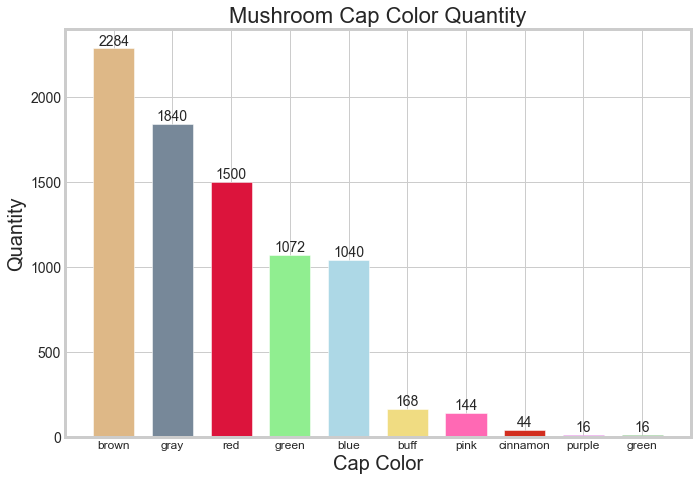

In [13]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = data['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#90ee90','#ADD8E6','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(10,7))
data_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','green','blue','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(data_bars)        
plt.show() #Display bars. 

## Bar chart shows the number of mushrooms which are edible or poisonous based on cap-color

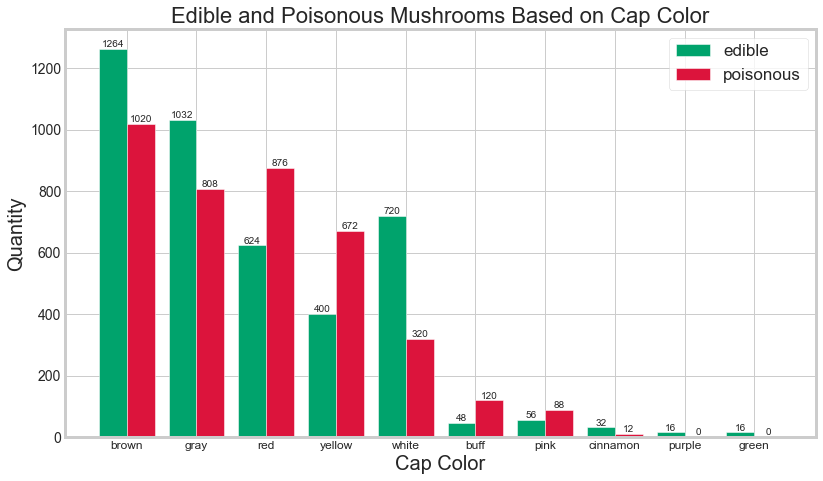

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [14]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(data[data['cap-color'] == capColor].index)
    edibles = len(data[(data['cap-color'] == capColor) & (data['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#00A36C')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#DC143C')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_cc)
print(poisonous_cc)

# The number of mushrooms based on "odor"'

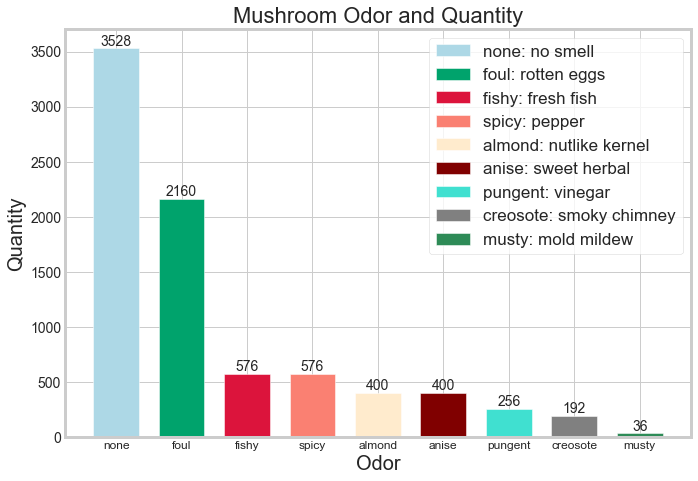

In [15]:
#Obtain total number of mushrooms for each 'odor' (Entire DataFrame)
odors = data['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#=====PLOT Preparations and Plotting====#
width = 0.7 
ind = np.arange(9)  # the x locations for the groups
colors = ['#ADD8E6','#00A36C','#DC143C','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show() #Display bars. 

## Number of mushrooms which are edible or poisonous based on odor

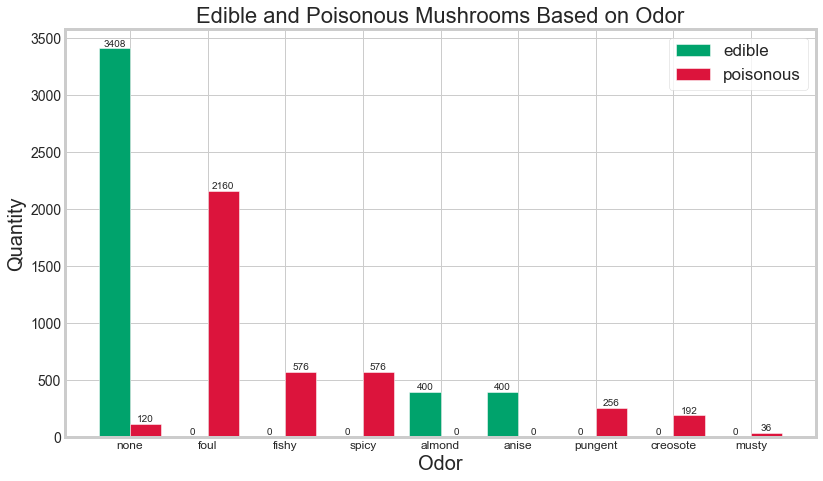

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [16]:
poisonous_od = [] #Poisonous odor list
edible_od = []    #Edible odor list
for odor in odor_labels:
    size = len(data[data['odor'] == odor].index)
    edibles = len(data[(data['odor'] == odor) & (data['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='#00A36C')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#DC143C')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()
print(edible_od)
print(poisonous_od)

According to our intuition, at least some of the "not nose friendly" mushrooms could be edible. However, the above contradicts that thought. All smelly and stingy mushrooms are poisonous. To my surprise all the almond and anise mushrooms are edible. Finally, we must be careful with mushrooms with no smell, there seems to be a small chance of getting poisoned.

## Population of types of Mushrooms

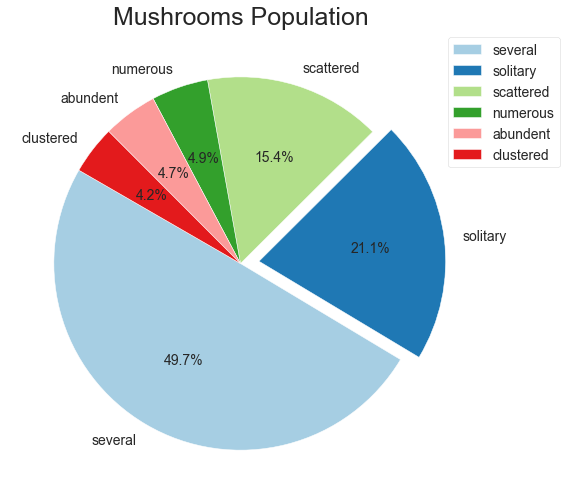

In [17]:
plt.figure(figsize=(8,8))
#plt.style.use('fivethirtyeight')
populations = data.population.value_counts().tolist()
labels = ['several','solitary','scattered','numerous','abundent','clustered']
explode =  (0, 0.1, 0, 0, 0, 0)
plt.pie(populations,labels=labels,startangle=150,explode=explode,autopct='%1.1f%%');
plt.title('Mushrooms Population',{'fontsize':25})
plt.legend(bbox_to_anchor=(1.2,1),loc="upper right",fontsize=14);

## Mushroom Habitat


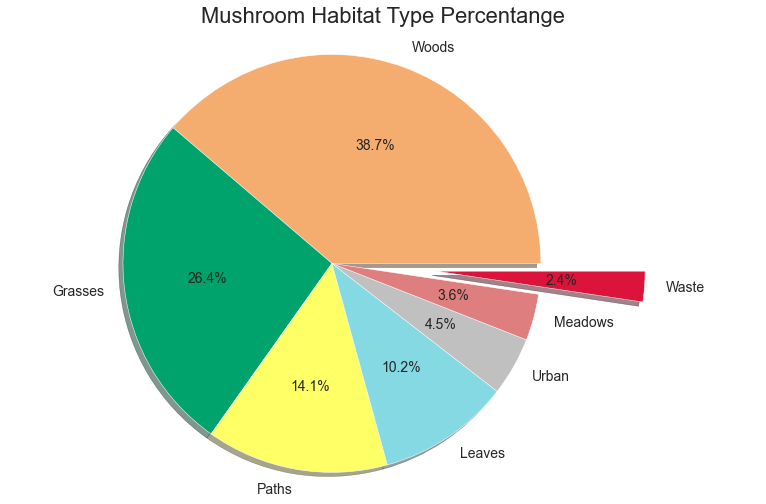

In [18]:
#Get the habitat types and its values for a Single Pie chart
habitats = data['habitat'].value_counts()
hab_size = habitats.values.tolist() #Provides numerical values
hab_types = habitats.axes[0].tolist() #Converts index labels object to list
# Data to plot
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#00A36C','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#DC143C']
explode = (0, 0, 0, 0, 0, 0,0.5)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Habitat Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

# Importing Additional Libraries

In [19]:
from sklearn.feature_selection import chi2, RFECV
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, auc, roc_curve, plot_roc_curve

In [20]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


## Class column is response and rest columns are predictors.

### Seprating Predictors and Response

In [21]:
# Categories in each feature x
column_list = data.columns.values.tolist()
#print(column_list)
for column_name in column_list:
    print(column_name)
    print(data[column_name].unique())

class
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [22]:
# Label encoding y - dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data['class'])
y

array([1, 0, 0, ..., 0, 1, 0])

### Poisonous = 1 Eatable = 0

In [23]:
# Dropping the class variable from the dataset
data = data.drop("class", axis = 1)

In [24]:
# We have used get dummies instead of one_hot encoding to preserve the names of the columns to do further data exploration and feature selection
# One_hot encoding will convert our X data into an numpy array

#drop_firstbool, default False
#Whether to get k-1 dummies out of k categorical levels by removing the first level.


X=pd.get_dummies(data ,drop_first=True)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Correlation Matrix (It would be hard to understand with so many features)

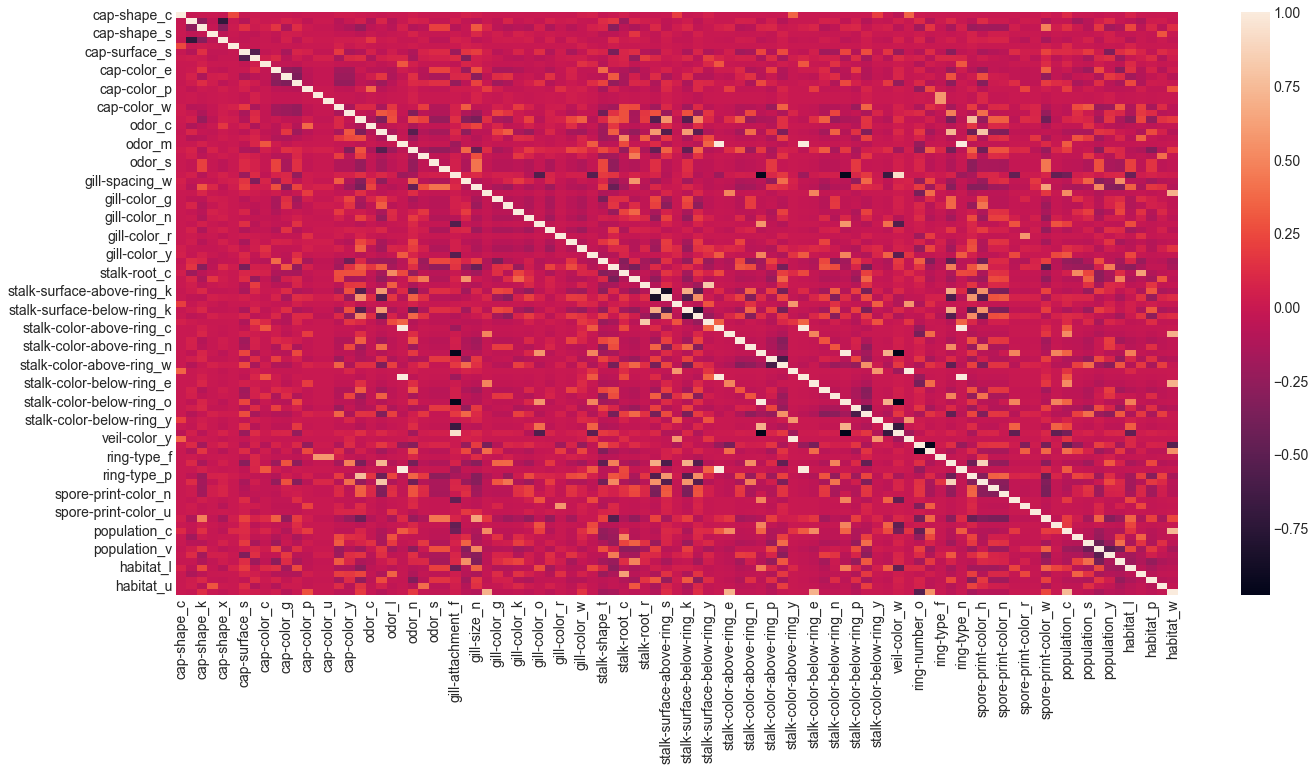

In [25]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),  annot = False);

## Splitting the data into train and test sets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 95)
(2438, 95)
(5686,)
(2438,)


In [28]:
count = 0
for i in y_test:
    if i == 1:
        count+=1
print('p',count)
print('e',len(y_test)-count)

p 1175
e 1263


In [29]:
X_train.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
325,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
68,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
5529,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
7021,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3246,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [30]:
y_train

array([0, 0, 1, ..., 0, 0, 1])

# Feature Importances Using Random Forest

In [31]:
# create the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)


# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores[:20]

odor_n                        0.122776
gill-size_n                   0.098485
odor_f                        0.089738
ring-type_p                   0.054403
spore-print-color_h           0.050329
stalk-surface-above-ring_k    0.044990
stalk-surface-below-ring_k    0.041544
stalk-surface-above-ring_s    0.032993
spore-print-color_w           0.032969
bruises_t                     0.032462
population_v                  0.031408
gill-spacing_w                0.025942
stalk-root_e                  0.023137
stalk-shape_t                 0.019311
ring-type_l                   0.017630
odor_p                        0.014931
stalk-root_b                  0.014881
ring-number_t                 0.013205
odor_c                        0.013109
spore-print-color_n           0.012797
dtype: float64

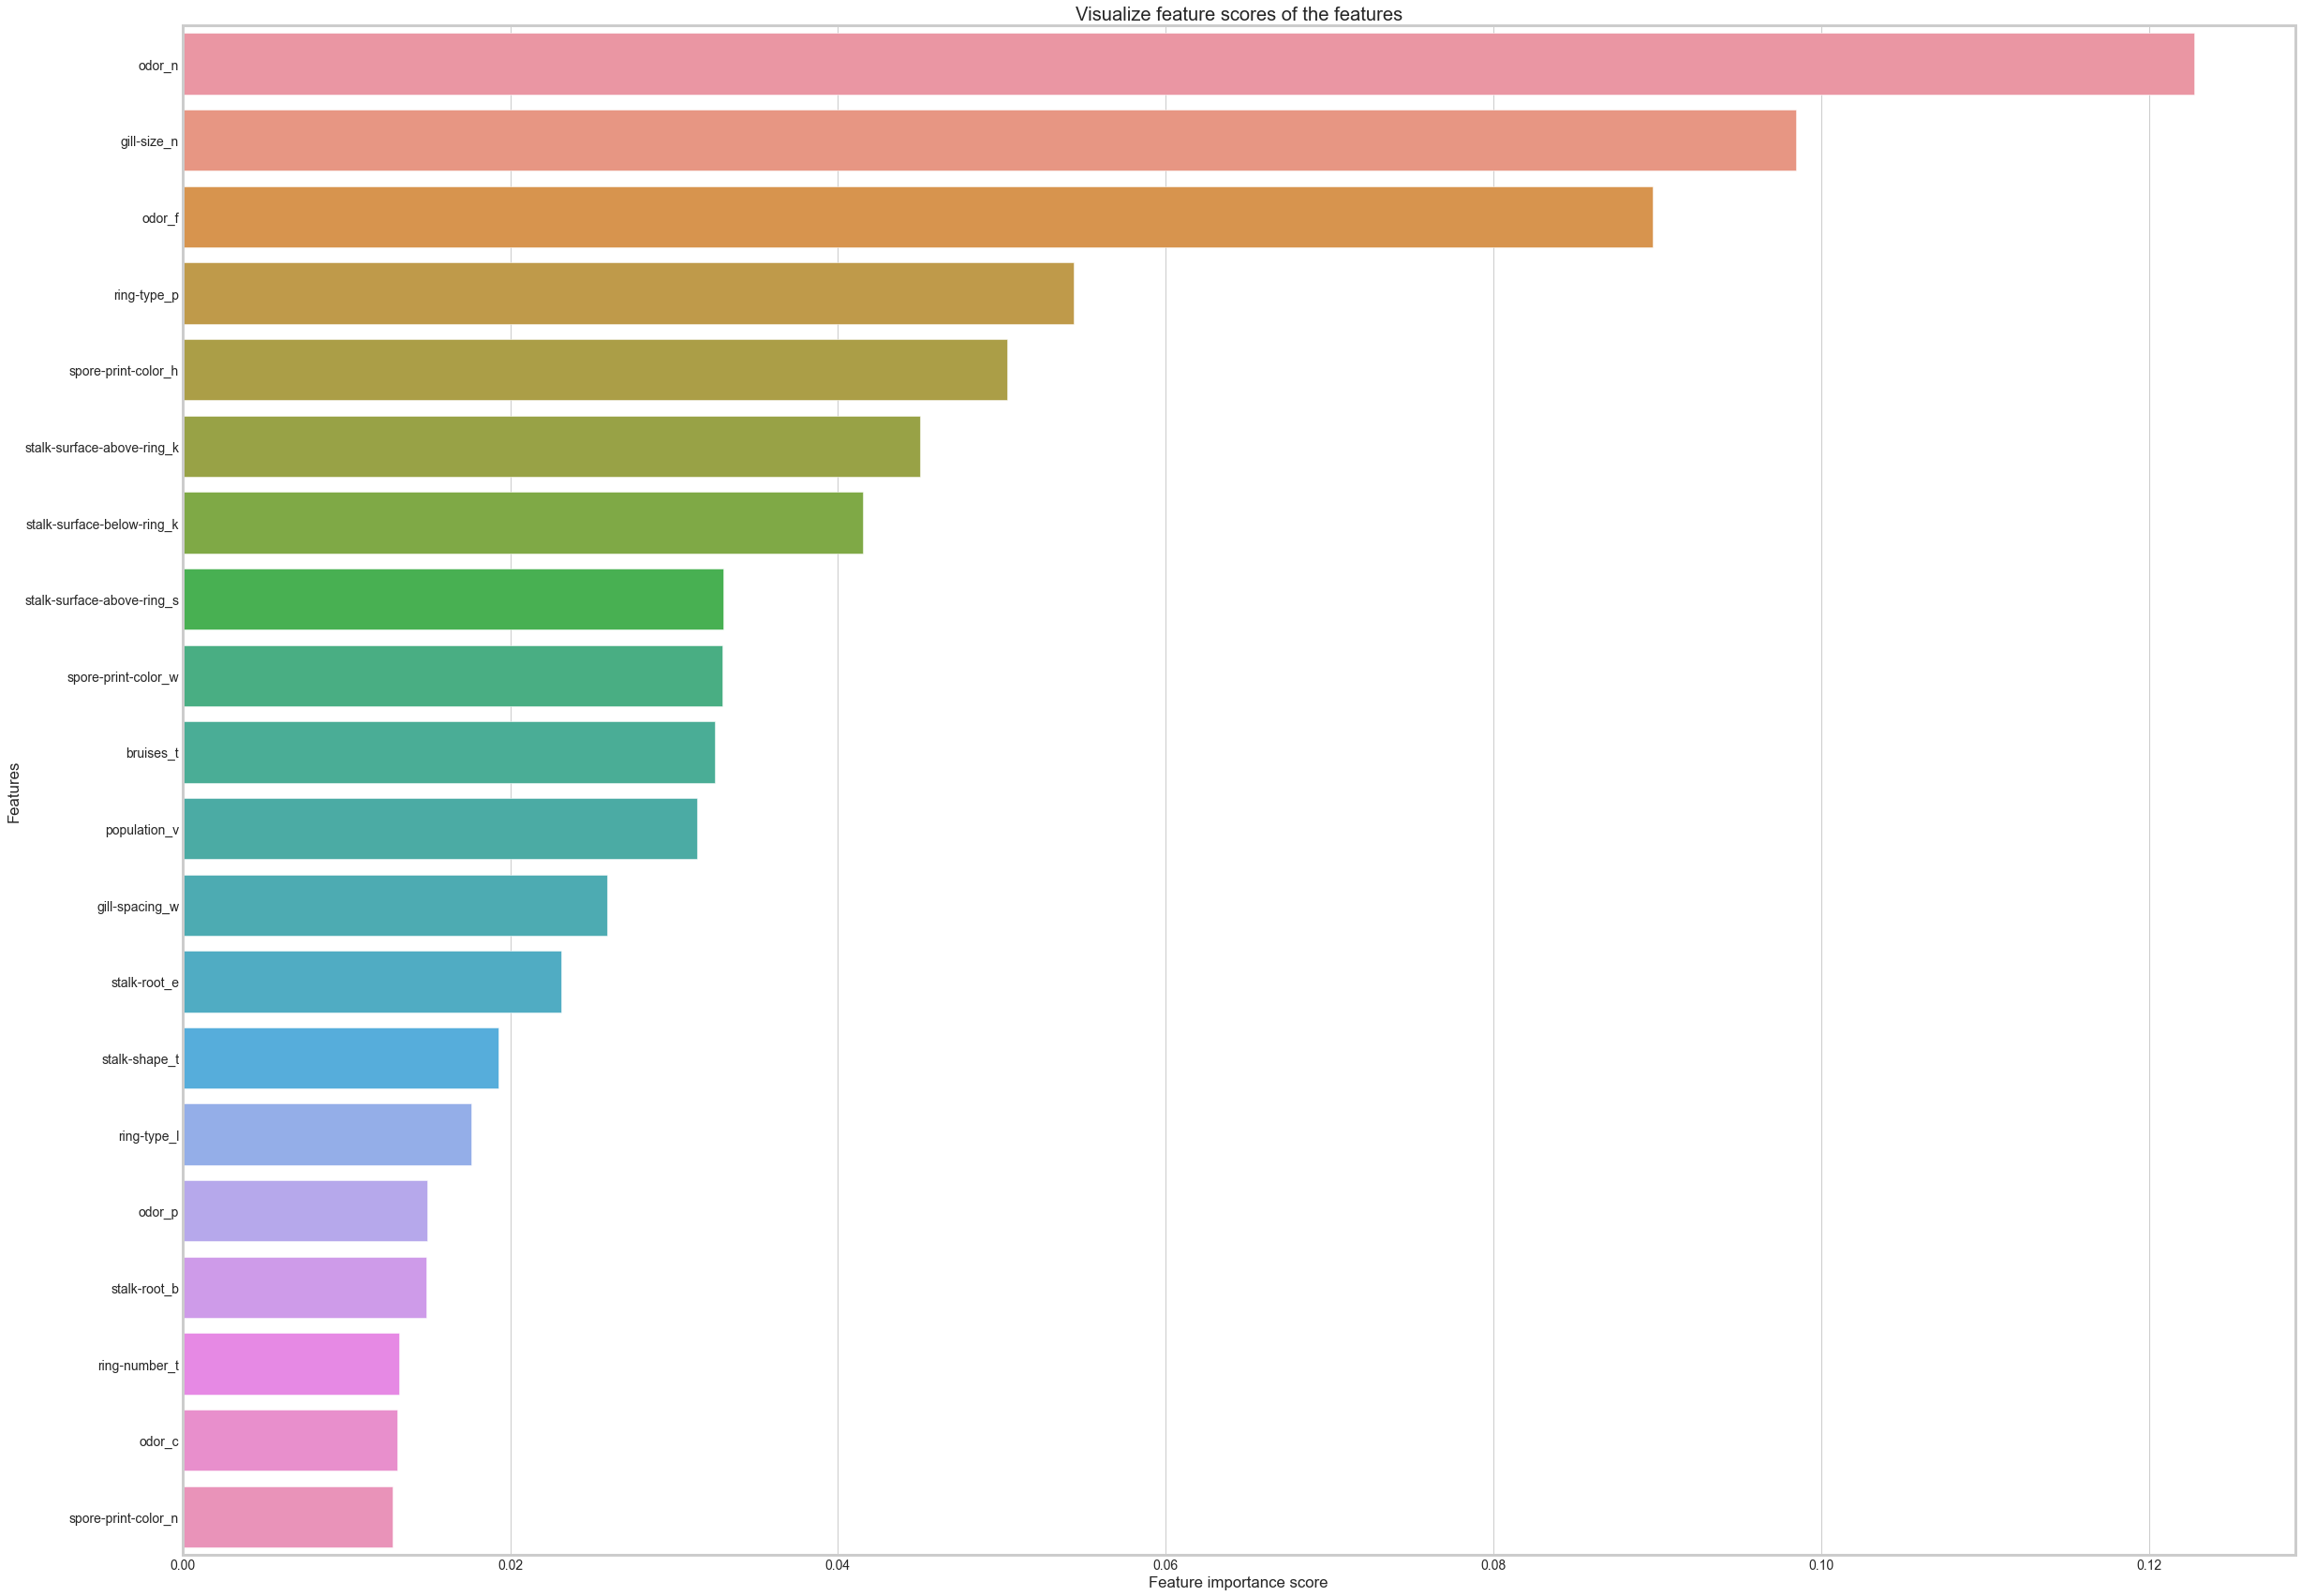

In [32]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(36, 28))
ax = sns.barplot(x=feature_scores[:20], y=feature_scores.index[:20])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index[:20])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Data Preprocessing

Since we have 21 features and every feature in that 21 features is categorical, we used dummy variable to convert these features into numerical features, and as a result, the number of columns will increase based how unique values in each feature.

Then to reduce those n features, We are going to use PCA  for reducing dimensionality.

After reducing some dimensionalities, We are going to fit those new features to the models, and see which one gives best results. 

## Feature Scaling

It is necessary to normalize data before performing PCA. The PCA calculates a new projection of your data set. In normalization of data, all variables have the same standard deviation, thus all variables have the same weight and your PCA calculates relevant axis.

## PCA:

We are going to convert the columns from 95 to 2 columns just for the sake of visualization.

Then we are going to see how many columns contain most of the data, to train our model.

And of course, before using PCA, we need to Standardize our data.


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
X_train

array([[-3.47372073, -2.45512986],
       [-2.4103919 , -1.98471915],
       [-0.01909727,  1.36871525],
       ...,
       [-2.41741813, -1.71221608],
       [-1.34608742, -1.30615728],
       [ 5.59437693, -0.57983578]])

## Functions to visualize Training & Test Set Results


In [36]:
def visualization_train(model):
    sns.set_context("notebook", font_scale= 2, rc={"lines.linewidth": 3})
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    #plt.legend()
def visualization_test(model):
    sns.set_context("notebook", font_scale= 2, rc={"lines.linewidth": 3})
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    #plt.legend()

### Creating a func to evaluate model's performance

In [37]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
        return accuracy_score(y_train,classifier.predict(X_train))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
        return accuracy_score(y_test,classifier.predict(X_test))

# Logistic Regression Model

## Fitting Logistic Regression model to the Training set

In [38]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 42)

classifier_lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

## Logistic Regression Training Results

In [39]:
lr_train_accuracy = print_score(classifier_lr,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9056

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2945
           1       0.96      0.84      0.90      2741

    accuracy                           0.91      5686
   macro avg       0.91      0.90      0.90      5686
weighted avg       0.91      0.91      0.91      5686


Confusion Matrix:
[[2843  102]
 [ 435 2306]]

Average Accuracy:	0.9054

Standard Deviation:	0.0110


## Logistic Regression Test Results

In [40]:
lr_test_accuracy = print_score(classifier_lr,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9053

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1263
           1       0.96      0.84      0.89      1175

    accuracy                           0.91      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.91      0.90      2438


Confusion Matrix:
[[1223   40]
 [ 191  984]]



## Visualising the Logistic Regression Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


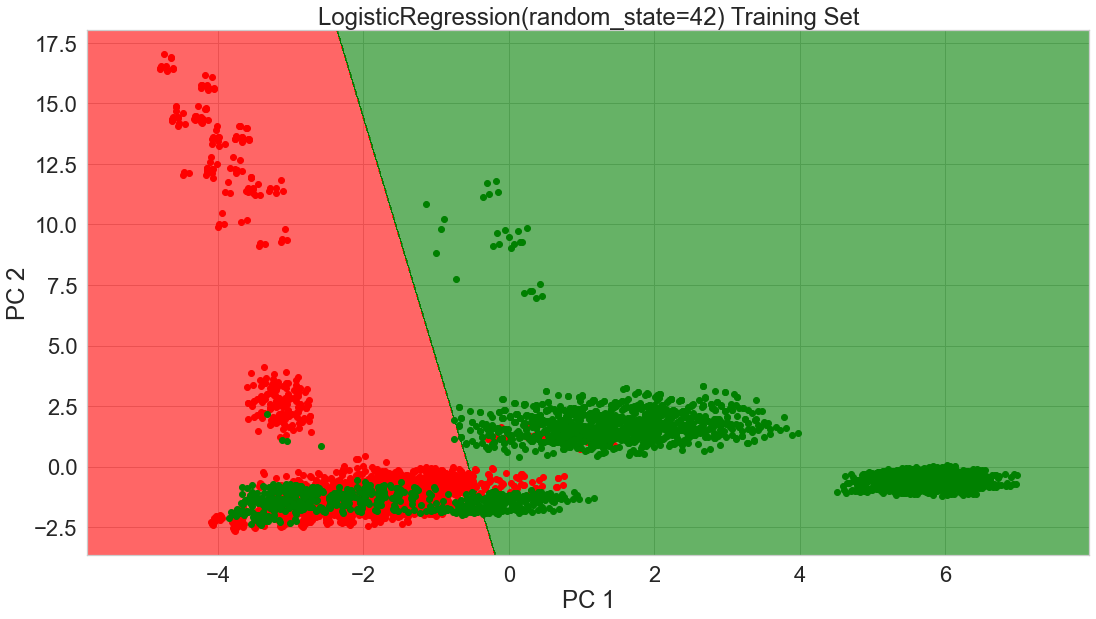

In [41]:
visualization_train(classifier_lr)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


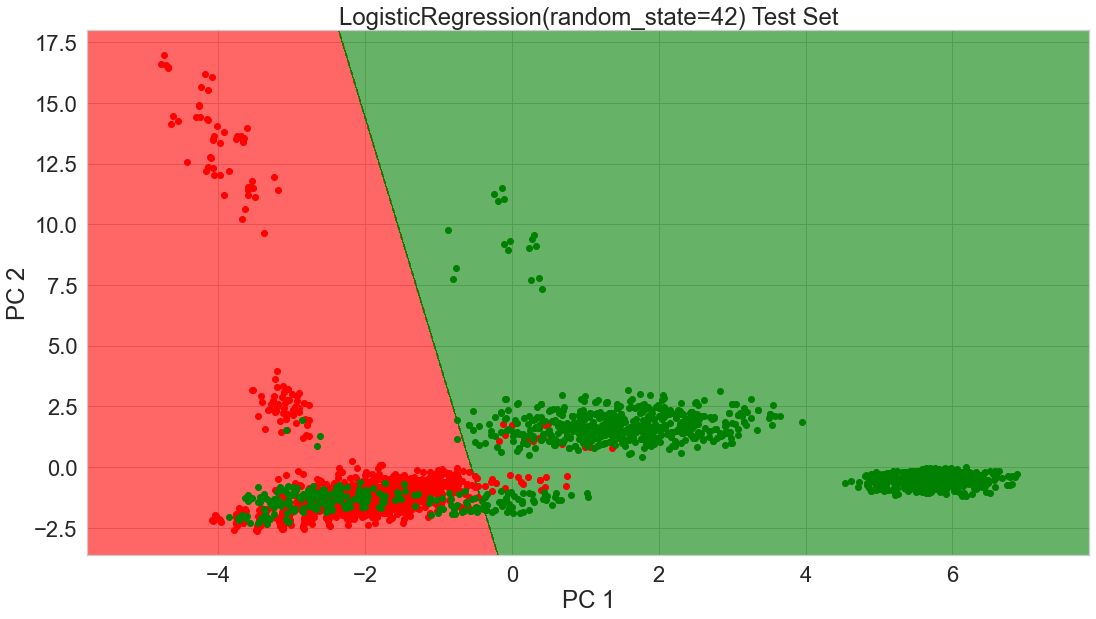

In [42]:
visualization_test(classifier_lr)

## Support Vector (SVC) Classification Model

## Fitting SVC to the Training set

In [43]:
from sklearn.svm import SVC

classifier_svm = SVC(kernel='rbf',random_state=42,probability=True)

classifier_svm.fit(X_train,y_train)

SVC(probability=True, random_state=42)

## SVC Training Results

In [44]:
svm_train_accuracy =  print_score(classifier_svm,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9121

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2945
           1       0.97      0.84      0.90      2741

    accuracy                           0.91      5686
   macro avg       0.92      0.91      0.91      5686
weighted avg       0.92      0.91      0.91      5686


Confusion Matrix:
[[2877   68]
 [ 432 2309]]

Average Accuracy:	0.9114

Standard Deviation:	0.0107


## SVC Test Results

In [45]:
svm_test_accuracy = print_score(classifier_svm,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9110

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1263
           1       0.97      0.84      0.90      1175

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438


Confusion Matrix:
[[1234   29]
 [ 188  987]]



## Visualising the SVC Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


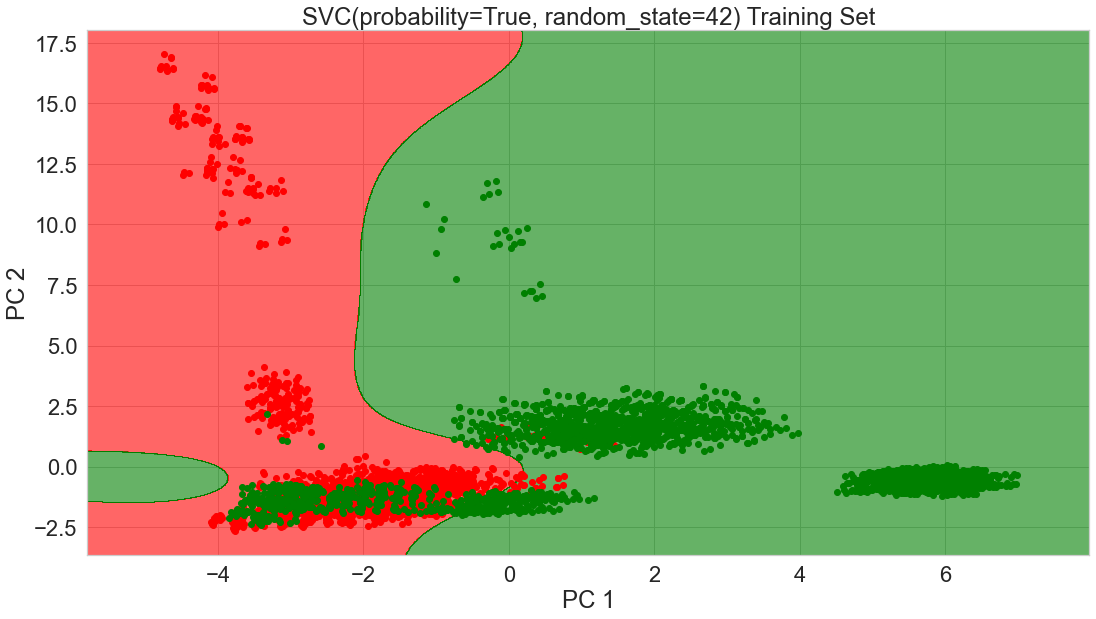

In [46]:
visualization_train(classifier_svm)

## Visualising the SVC Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


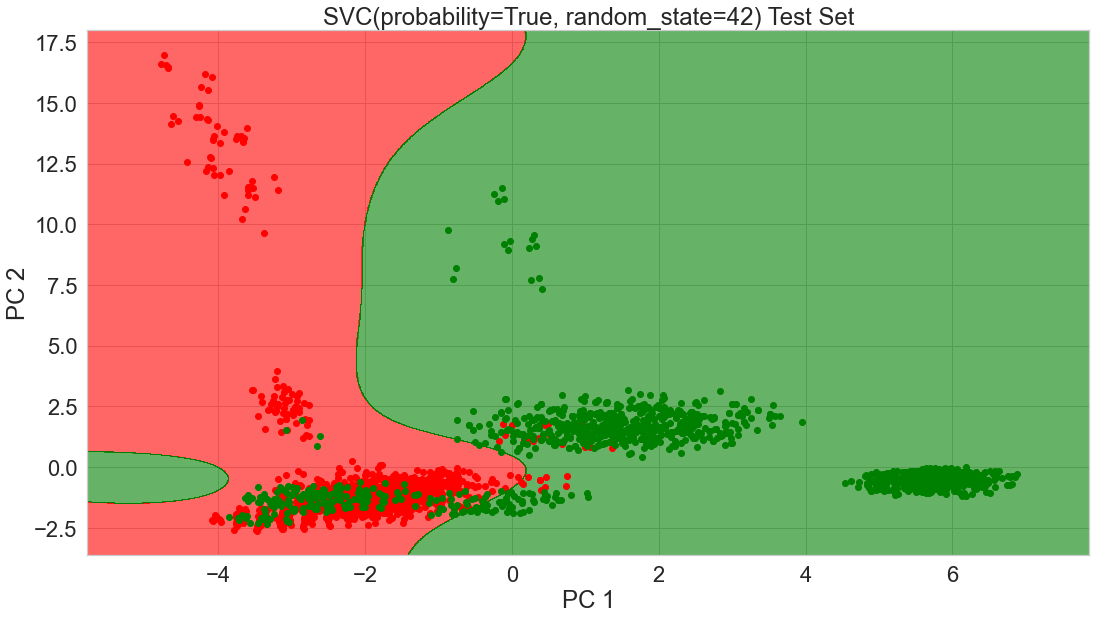

In [47]:
visualization_test(classifier_svm)

## Decision Tree Classification Model

## Fitting Decision Tree classifier to the Training set

In [48]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier_dt = DT(criterion='entropy',random_state=42)
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Decision Tree Training Results

In [49]:
dt_train_accuracy = print_score(classifier_dt,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2945
           1       1.00      1.00      1.00      2741

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2945    0]
 [   0 2741]]

Average Accuracy:	0.8911

Standard Deviation:	0.0112


## Decision Tree Test Results

In [50]:
dt_test_accuracy = print_score(classifier_dt,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8905

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1263
           1       0.89      0.88      0.89      1175

    accuracy                           0.89      2438
   macro avg       0.89      0.89      0.89      2438
weighted avg       0.89      0.89      0.89      2438


Confusion Matrix:
[[1142  121]
 [ 146 1029]]



## Visualising the Decision tree Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


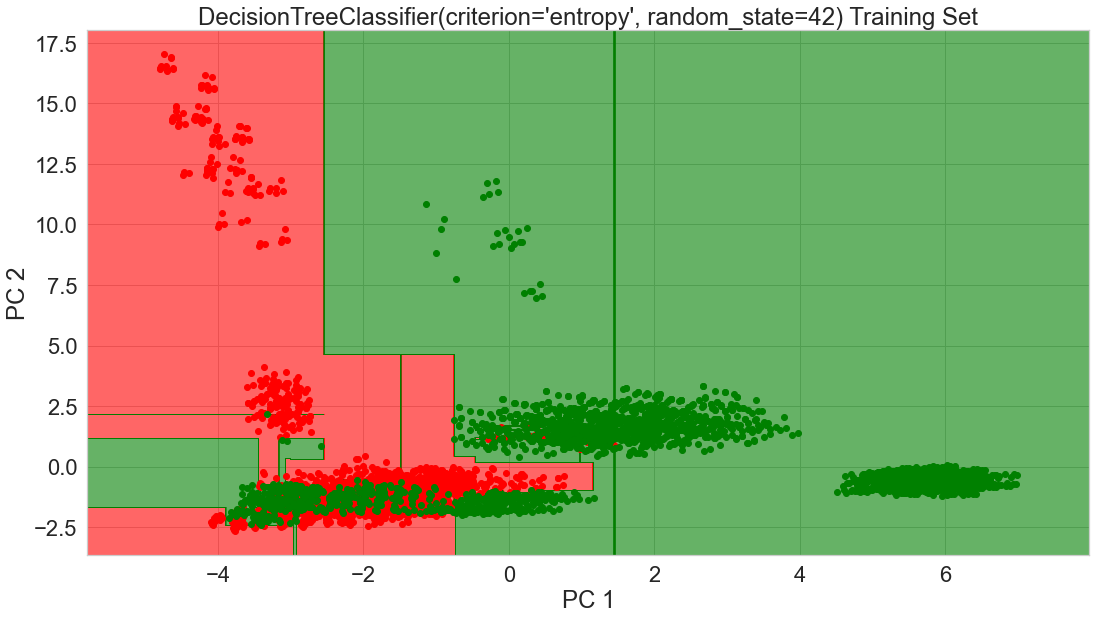

In [51]:
visualization_train(classifier_dt)

## Visualising the Decision Tree Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


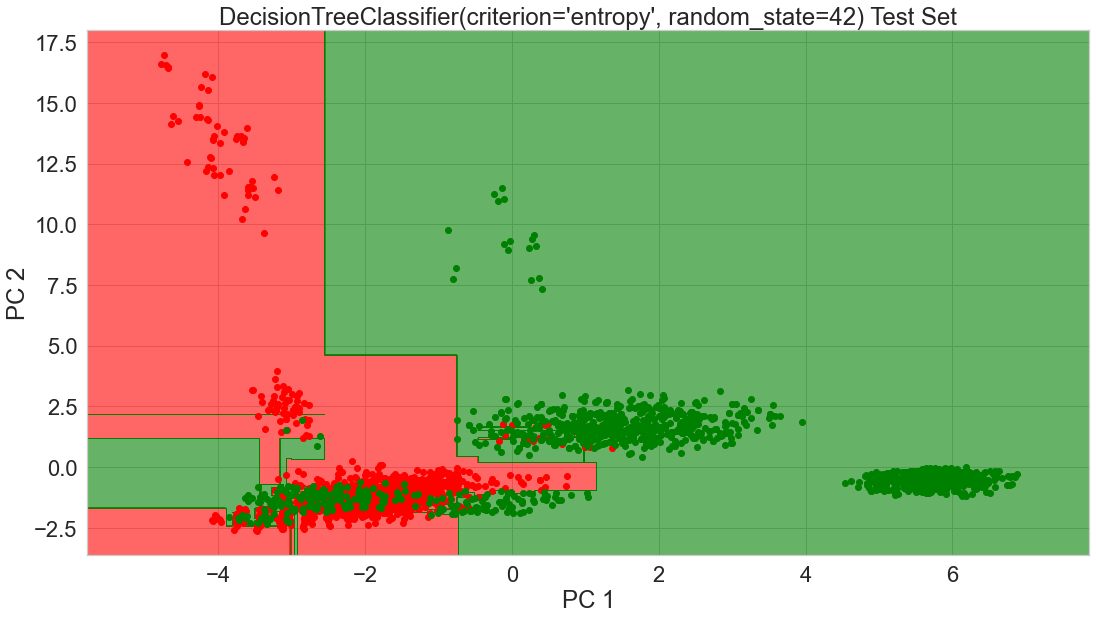

In [52]:
visualization_test(classifier_dt)

# This is a clear case of overfitting

# What is the solution to overfitting in a Decision Tree?

# A hyperparameter tuned Random Forest should solve this issue for us

# Random Forest Classification Model

## Fitting Random Forest classifier to the Training set

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
 'n_estimators': np.arange(50,550,50).tolist(), 
 # n_estimators starting from 50 to 500 with a step size of 50
 
 'max_depth': np.arange(3,21,1).tolist(), 
 # max depth selection from 3 to 20 with a step size of 1
 
 'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
 
 'max_leaf_nodes': np.arange(10,51,1).tolist(),
 # Max leaf selection between 10 and 50 with a step size of 1
 
 'min_samples_split': [2,5,10],
 
 'bootstrap': [True]
 #'criterion': 'mse',
 #'n_jobs': -1,
 #'oob_score': False,
 #'random_state': 42,
 #'verbose': 0,

}

# Create a based model
rf = RandomForestClassifier(random_state = 42)
# Instantiate the grid search model

# Use the random grid to search for best hyperparameters
# Random search of parameters, using 10 fold cross validation, 
# search across 10 different combinations, and use all available cores using n_jobs = -1
# Verbose = 2 would tell me the timeline of the model fitting and all the relevant information


rand_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit the randomized search to the data
rand_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [10, 11, 12, 13, 14,
                                                           15, 16, 17, 18, 19,
                                                           20, 21, 22, 23, 24,
                                                           25,

In [54]:
print("Random Forest Classifier Best estimator is :", rand_search.best_estimator_)
print("Random Forest Classifier Best parameter is :", rand_search.best_params_)
print("Random Forest Classifier Best score is :", rand_search.best_score_)
print("Random Forest Classifier Best index is :", rand_search.best_index_)

Random Forest Classifier Best estimator is : RandomForestClassifier(max_depth=9, max_features=0.8999999999999999,
                       max_leaf_nodes=46, n_estimators=200, random_state=42)
Random Forest Classifier Best parameter is : {'n_estimators': 200, 'min_samples_split': 2, 'max_leaf_nodes': 46, 'max_features': 0.8999999999999999, 'max_depth': 9, 'bootstrap': True}
Random Forest Classifier Best score is : 0.9285951259699631
Random Forest Classifier Best index is : 5


## Random Forest Training Results

In [55]:
rf_train_accuracy = print_score(rand_search.best_estimator_,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9418

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2945
           1       0.97      0.91      0.94      2741

    accuracy                           0.94      5686
   macro avg       0.94      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2866   79]
 [ 252 2489]]

Average Accuracy:	0.9300

Standard Deviation:	0.0088


## Random Forest Test Results

In [56]:
rf_test_accuracy = print_score(rand_search.best_estimator_,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9249

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1263
           1       0.96      0.88      0.92      1175

    accuracy                           0.92      2438
   macro avg       0.93      0.92      0.92      2438
weighted avg       0.93      0.92      0.92      2438


Confusion Matrix:
[[1218   45]
 [ 138 1037]]



## Visualising the Random Forest Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


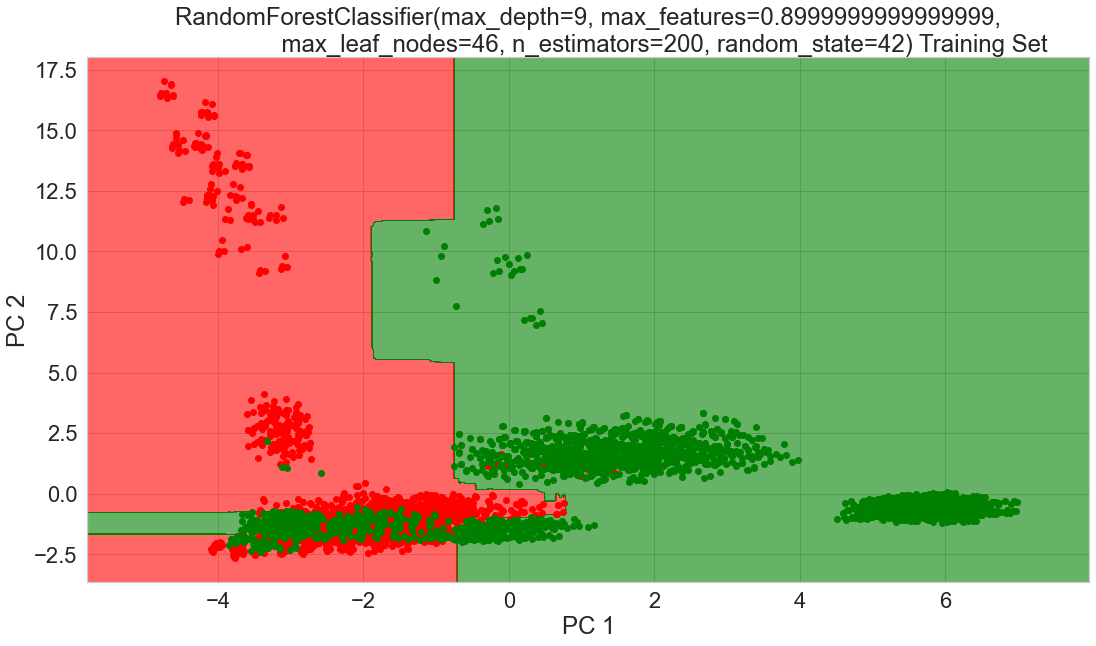

In [57]:
visualization_train(rand_search.best_estimator_)

## Visualising the Random Forest Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


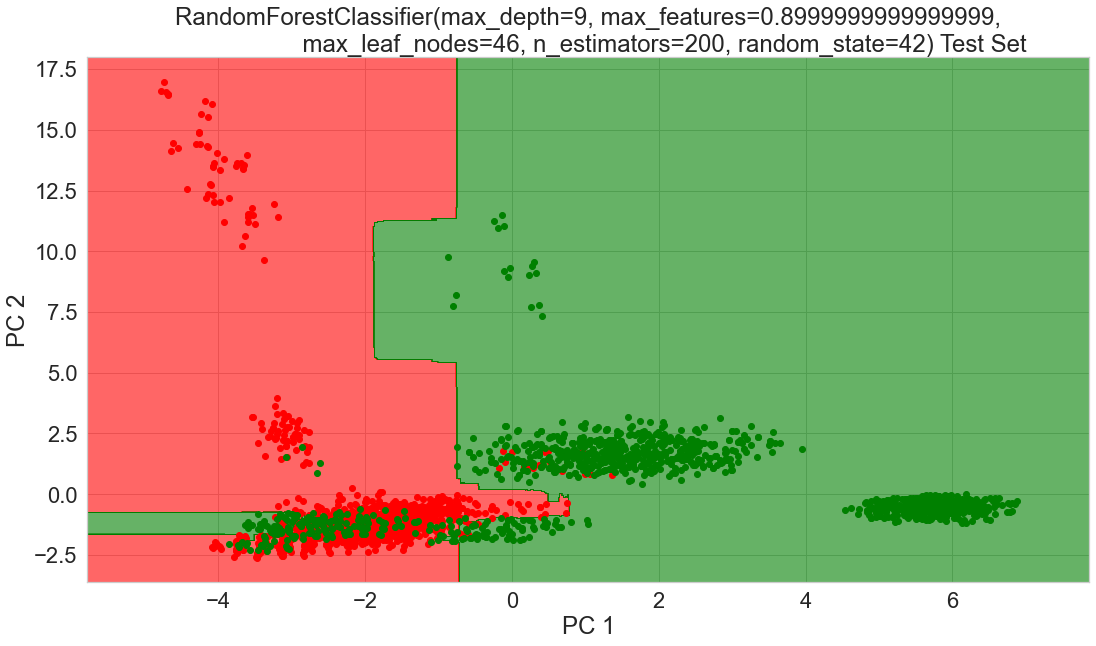

In [58]:
visualization_test(rand_search.best_estimator_)

### Make the predictions with the model

### Best Random Forest

In [59]:
rf_best = rand_search.best_estimator_
rf_best

rf_train_predictions = rf_best.predict(X_train)
rf_predictions = rf_best.predict(X_test)

rf_train_probs = rf_best.predict_proba(X_train)[:, 1]
rf_probs = rf_best.predict_proba(X_test)[:, 1]

### Logistic Regression

In [60]:
lr_train_predictions = classifier_lr.predict(X_train)
lr_predictions = classifier_lr.predict(X_test)

lr_train_probs = classifier_lr.predict_proba(X_train)[:, 1]
lr_probs = classifier_lr.predict_proba(X_test)[:, 1]

### SVM

In [61]:
svm_train_predictions = classifier_svm.predict(X_train)
svm_predictions = classifier_svm.predict(X_test)

svm_train_probs = classifier_svm.predict_proba(X_train)[:, 1]
svm_probs = classifier_svm.predict_proba(X_test)[:, 1]

### Decision Tree

In [62]:
dt_train_predictions = classifier_dt.predict(X_train)
dt_predictions = classifier_dt.predict(X_test)

dt_train_probs = classifier_dt.predict_proba(X_train)[:, 1]
dt_probs = classifier_dt.predict_proba(X_test)[:, 1]

## Plot the ROC AUC Scores for training and testing data for Best Random Forest 

Train ROC AUC Score: 0.9806656017006422
Test ROC AUC Score: 0.9696501069725914


<Figure size 1440x720 with 0 Axes>

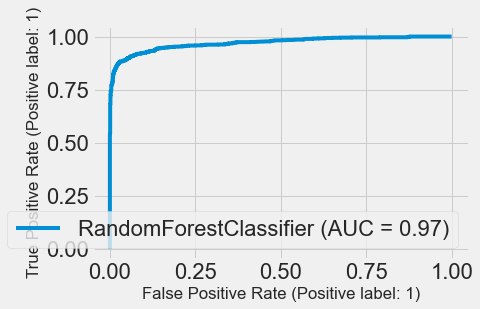

In [63]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score ,roc_curve, plot_roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(y_train, rf_train_probs)}')
print(f'Test ROC AUC Score: {roc_auc_score(y_test, rf_probs)}')

plt.style.use('fivethirtyeight')

plt.figure(figsize = (20, 10))

plot_roc_curve(rf_best, X_test, y_test);

# Comparison of ROC-AUC Curve amongst different ML models

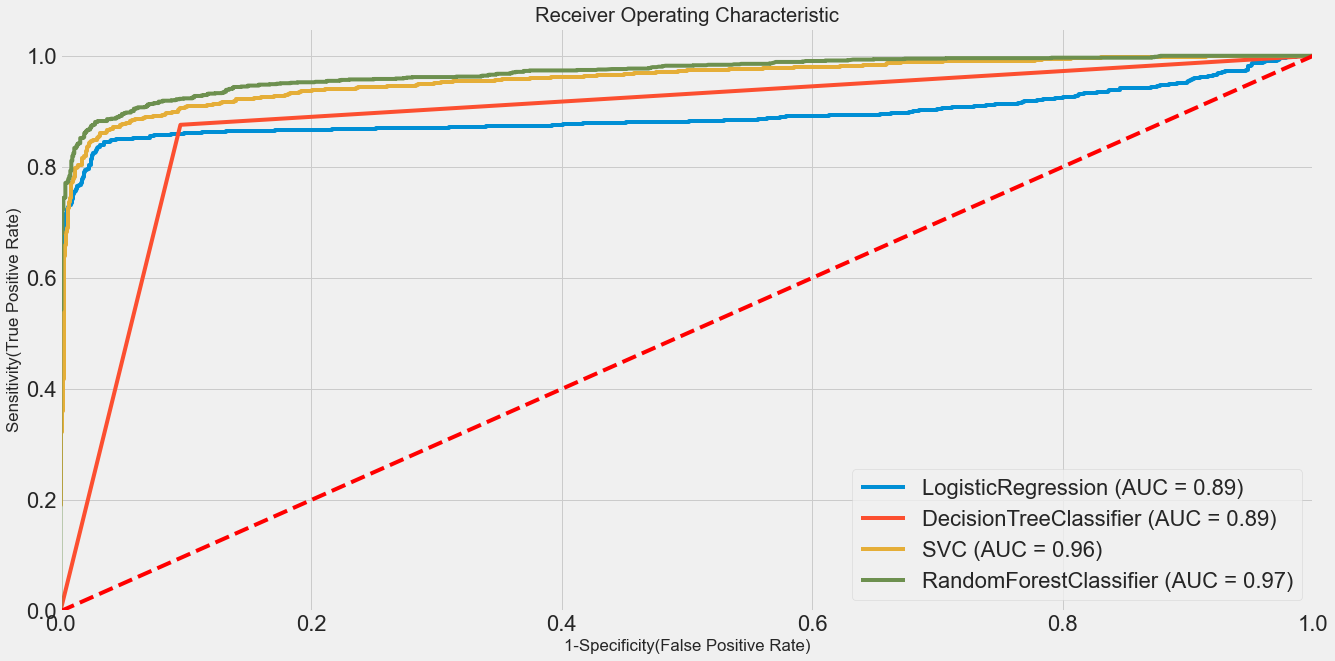

In [64]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize= (20,10))
classifiers = [classifier_lr, classifier_dt, classifier_svm, rf_best]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

# Plot the Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix
import itertools

#  Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='Accent'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

### Confusion Matrix

### Logistic Regression

In [66]:
count = 0
for i in lr_predictions:
    if i == 1:
        count+=1
print(count)

1024


Confusion matrix, without normalization
[[1223   40]
 [ 191  984]]


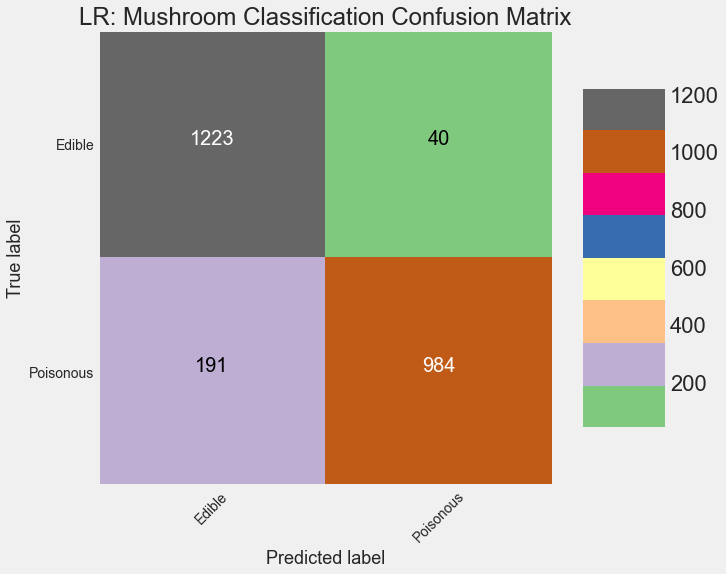

In [67]:
cm_lr = confusion_matrix(y_test, lr_predictions)
plot_confusion_matrix(cm_lr, classes = ['Edible','Poisonous'],
                      title = 'LR: Mushroom Classification Confusion Matrix')

### SVM

Confusion matrix, without normalization
[[1234   29]
 [ 188  987]]


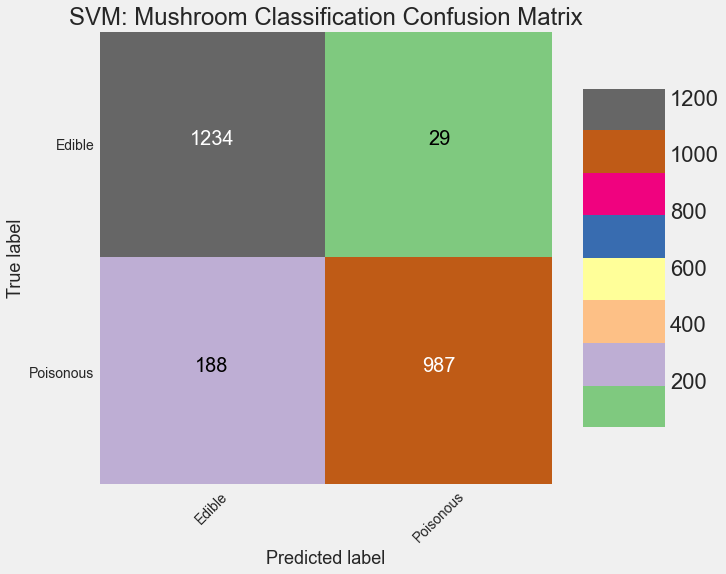

In [68]:
cm_svm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(cm_svm, classes = ['Edible','Poisonous'],
                      title = 'SVM: Mushroom Classification Confusion Matrix')

### Decision Tree

Confusion matrix, without normalization
[[1142  121]
 [ 146 1029]]


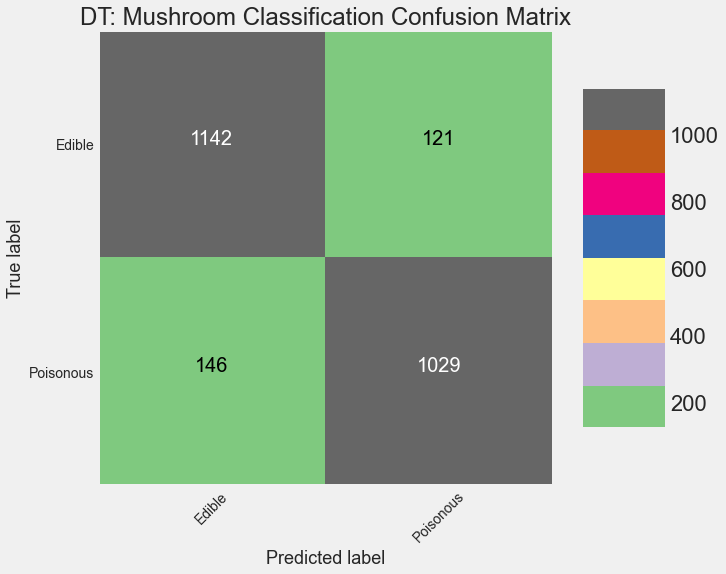

In [69]:
cm_dt = confusion_matrix(y_test, dt_predictions)
plot_confusion_matrix(cm_dt, classes = ['Edible','Poisonous'],
                      title = 'DT: Mushroom Classification Confusion Matrix')

### Best Random Forest

Confusion matrix, without normalization
[[1218   45]
 [ 138 1037]]


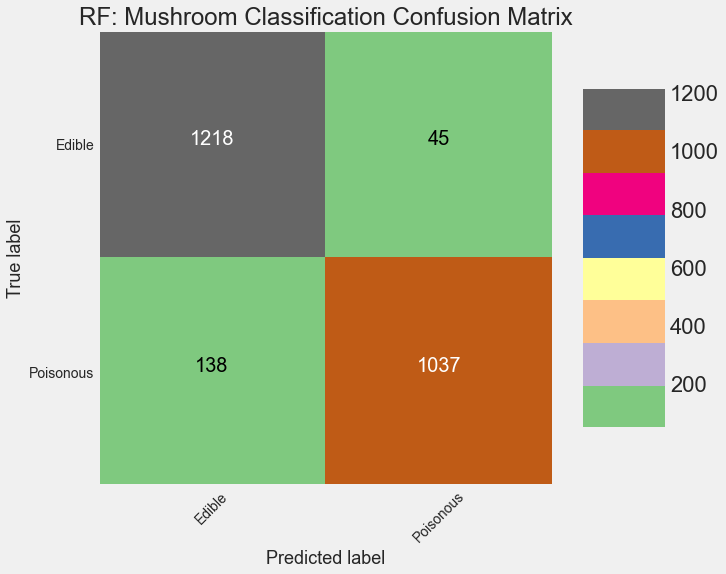

In [70]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Edible','Poisonous'],
                      title = 'RF: Mushroom Classification Confusion Matrix')

In [71]:
print(lr_train_accuracy)

0.9055575096728807


In [72]:
accuracy_all = pd.DataFrame({"Logistic Regression":[lr_train_accuracy,lr_test_accuracy],
              "SVM":[svm_train_accuracy,svm_test_accuracy],
              "Decision Tree":[dt_train_accuracy,dt_test_accuracy],
              "Random Forest":[rf_train_accuracy,rf_test_accuracy]}, index=['Train','Test'])
accuracy_all

,Logistic Regression,SVM,Decision Tree,Random Forest
Train,0.905558,0.912065,1.000000,0.941787
Test,0.905250,0.910993,0.890484,0.924938
